1. Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Load dataset

In [3]:
df = pd.read_csv("Titanic-Dataset.csv")

3. Basic EDA

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


4. Handle Missing Values

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df["Age"].fillna(df['Age'].median(), inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_36328\3322898384.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df['Age'].median(), inplace=True)


In [9]:
df['Embarked'].fillna(df['Embarked'].mode()[0] , inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_36328\617023353.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0] , inplace=True)


5. Drop unnecessary columns

In [10]:
df.drop('Cabin' , axis=1 , inplace=True)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

6. Encode categorical variables

In [12]:
df['Sex']=df['Sex'].map({'male':0, 'female':1})

In [13]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [14]:
df.drop(['Name','Ticket','PassengerId'], axis=1, inplace=True)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age','Fare']] = scaler.fit_transform(df[['Age','Fare']])

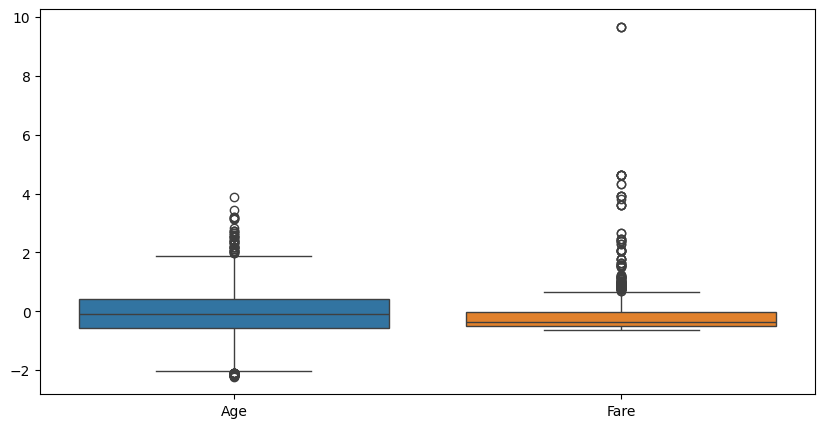

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['Age','Fare']])
plt.show()

In [17]:
Q1 = df['Fare'].quantile(0.25)

Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['Fare'] >= lower) & (df['Fare'] <= upper)]

Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['Age'] >= lower) & (df['Age'] <= upper)]

In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,-0.565736,1,0,-0.502445,False,True
2,1,3,1,-0.258337,0,0,-0.488854,False,True
3,1,1,1,0.433312,1,0,0.420730,False,True
4,0,3,0,0.433312,0,0,-0.486337,False,True
5,0,3,0,-0.104637,0,0,-0.478116,True,False


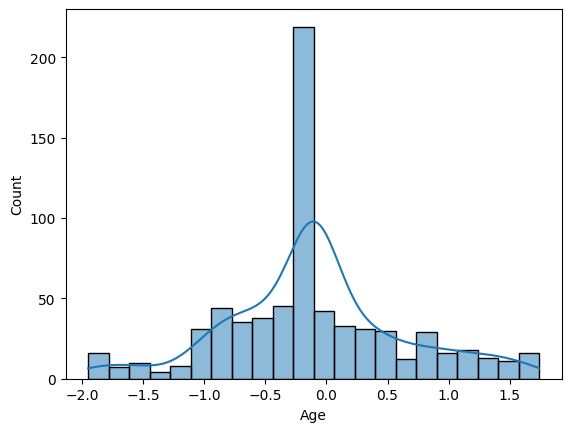

In [25]:
sns.histplot(df['Age'], kde=True)
plt.show()


### Observation:
- Most passengers are between 20–40 years old.
- Age distribution is slightly right-skewed.
- Very few elderly passengers are present.


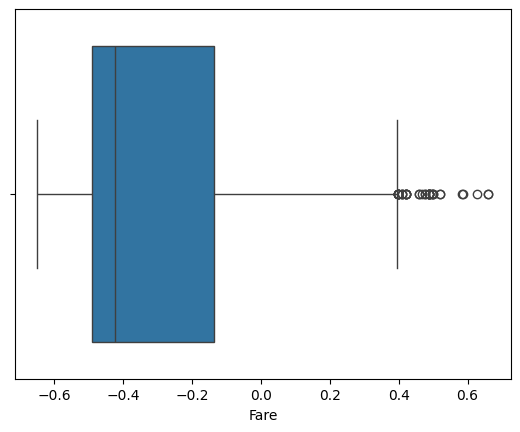

In [26]:
sns.boxplot(x=df['Fare'])
plt.show()


### Observation:
- Fare has extreme outliers.
- Distribution is highly right-skewed.
- Majority passengers paid lower fare.


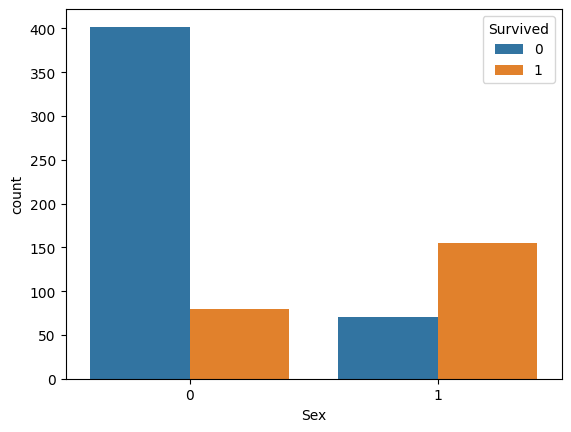

In [27]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.show()


### Observation:
- Female passengers had higher survival rate.
- Male passengers had lower survival rate.
- Gender strongly influences survival.


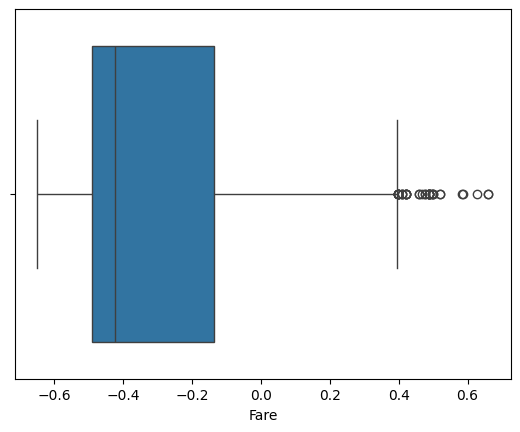

In [20]:
sns.boxplot(x=df['Fare'])
plt.show()


<Axes: >

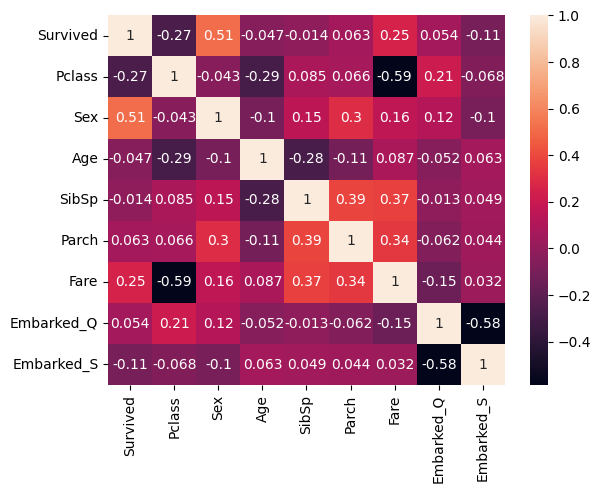

In [21]:
sns.heatmap(df.corr(), annot=True)


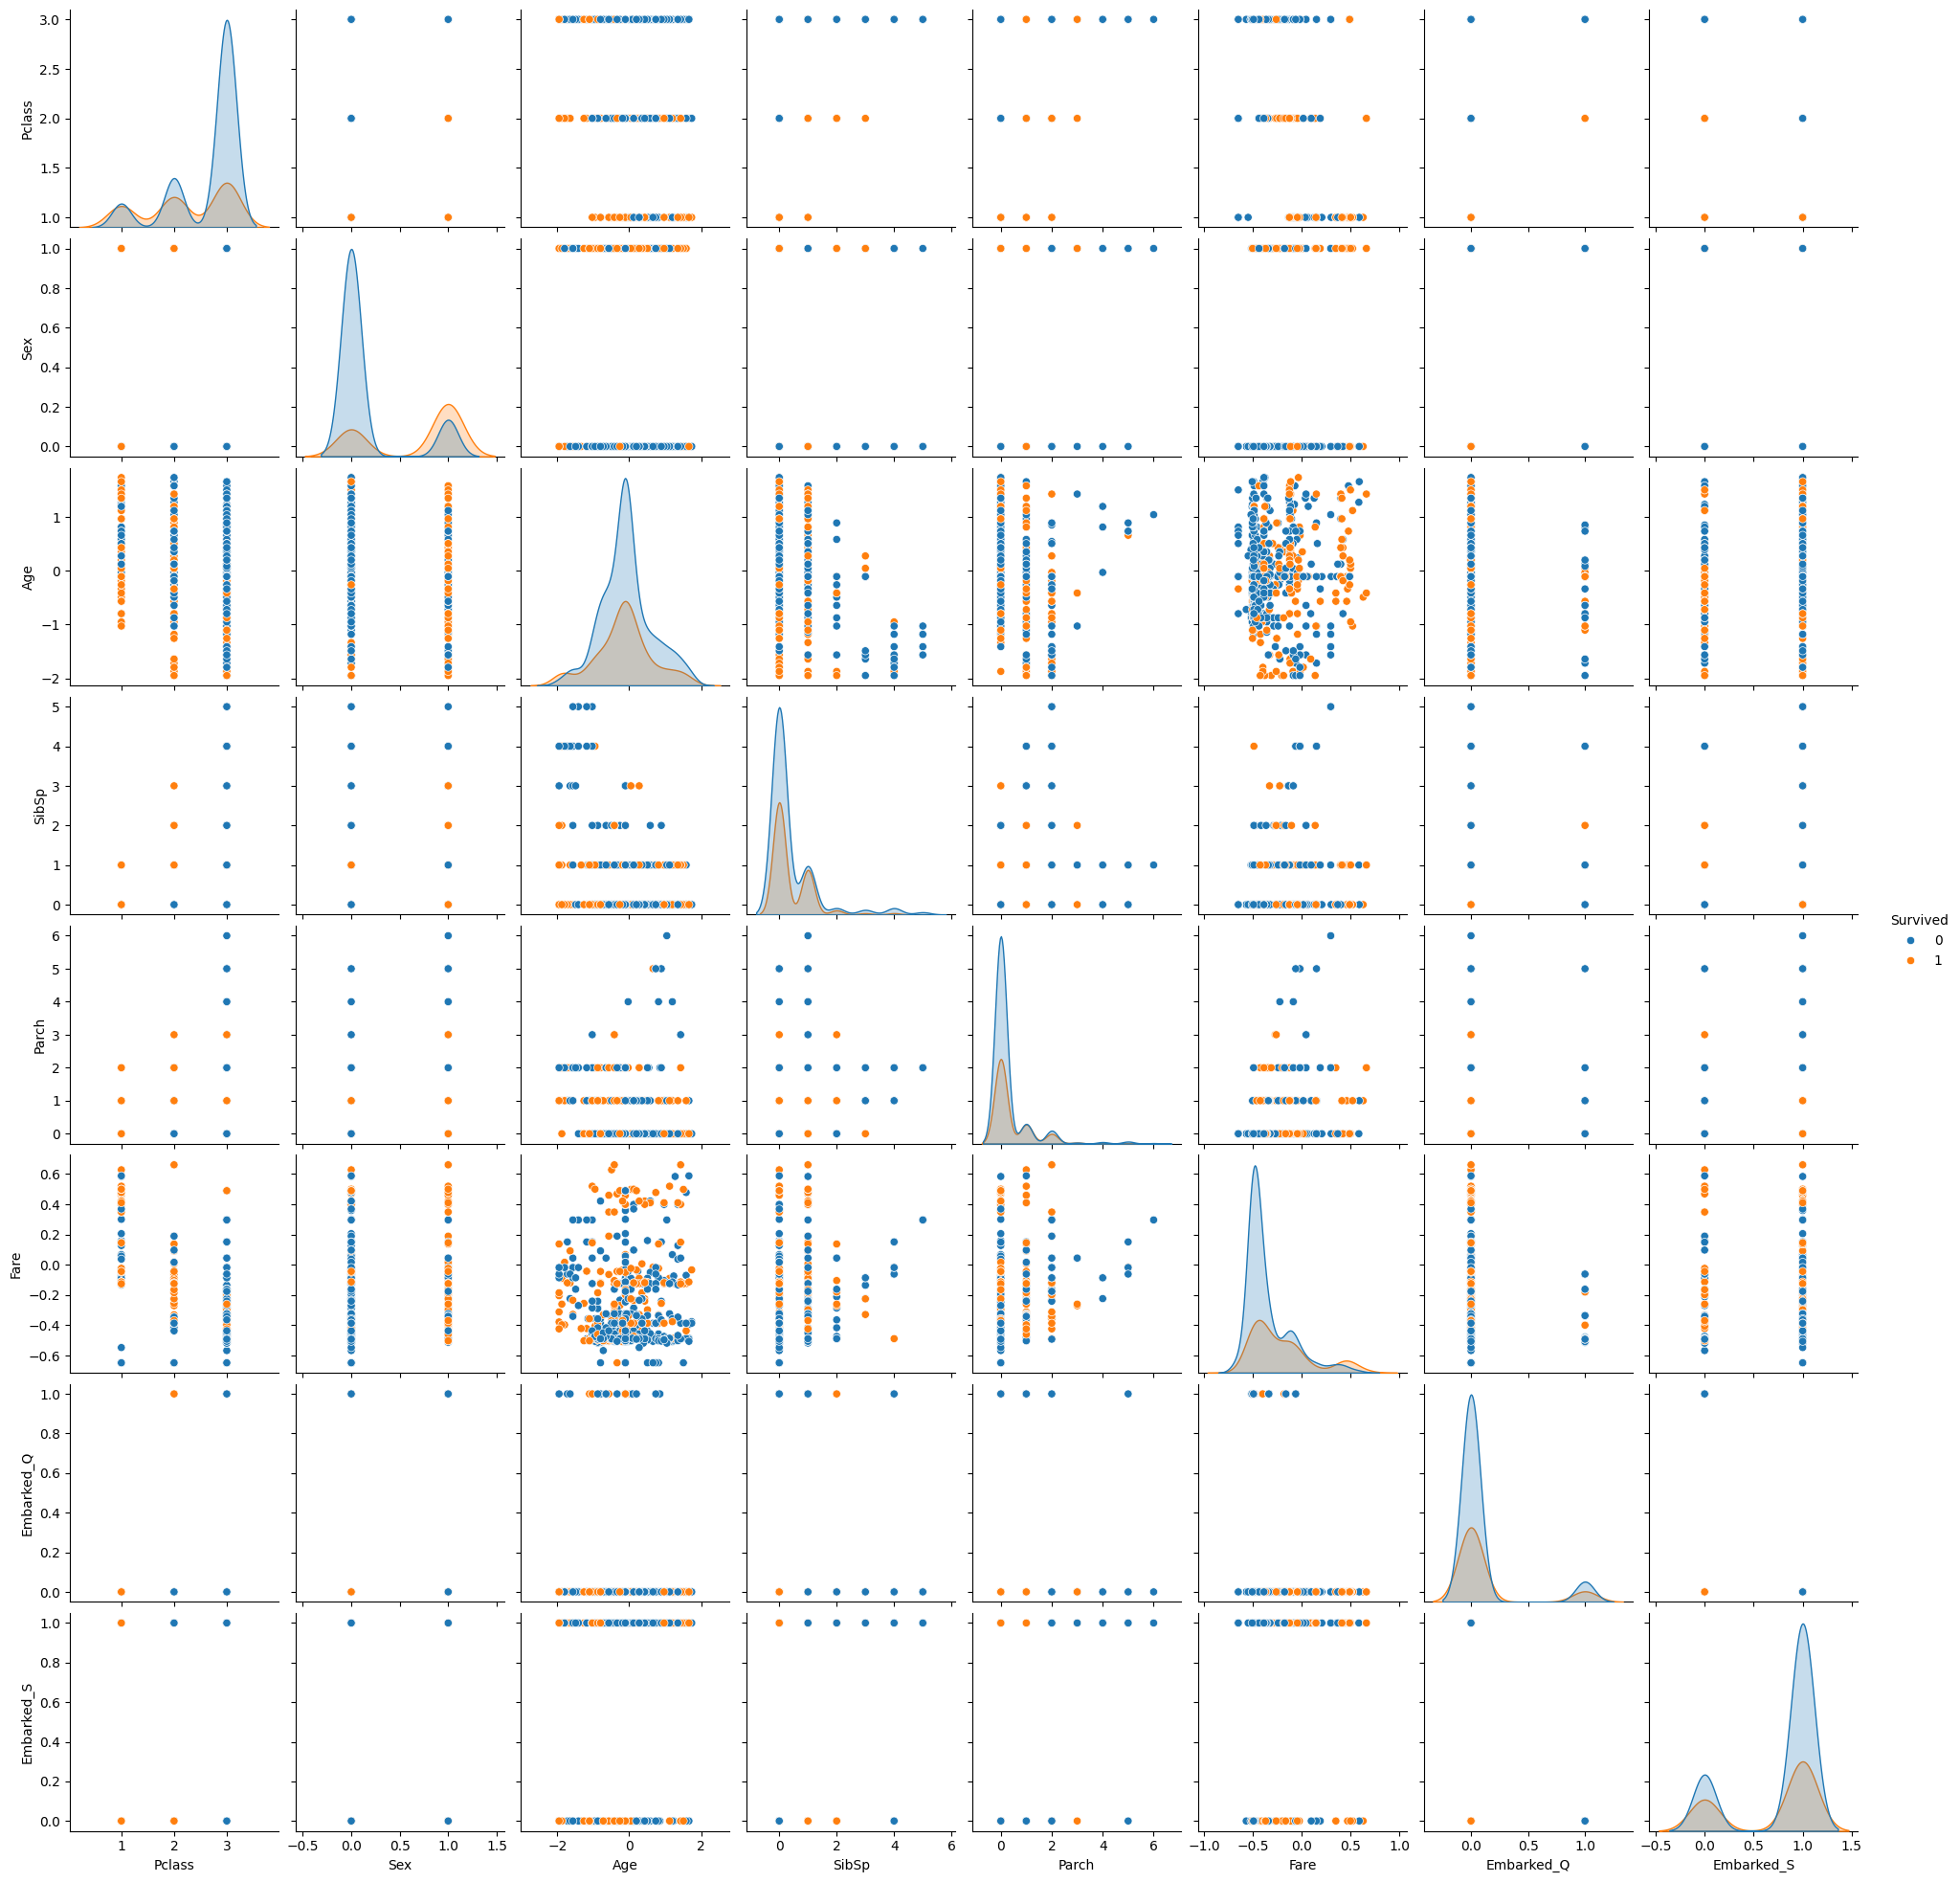

In [22]:
sns.pairplot(df, hue="Survived")
